# Abstract

Kaggle dataset: https://www.kaggle.com/shanelev/seattle-airbnb-listings


On a holiday in Seattle for business or pleasure? Looking for best place to stay in Seattle? Curious about the AirBnB prices in Seattle?
This might help you make an informed decision on the ideal place for you to stay at Seattle.

Objective:

### Predict AirBnb prices in Seattle.

Applied methods are:
* Cleaning tasks such as dropping bad data, dealing with missing values.
* Modification of existing features e.g. standardization, log transforms etc.
* Creation or derivation of new features, usually from existing ones.
* Graphs such as plots, heatmap have been used.

#### Let's get started.


# Overview of data

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
# importing the dataset
seattle=pd.read_csv("seattle_01.csv", decimal = ',')

In [3]:
seattle.head()

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5,8,4,2.5,250,46:14.7,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2,1,100,08:45.3,47.529846,-122.27584,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1,1,82,04:19.9,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly
3,3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5,2,0,1,49,11:25.5,47.52398,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1,1,90,12:38.4,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly


In [4]:
seattle.tail()

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
7571,7970,30976187,231435350,Entire home/apt,"Seattle, WA, United States",0,NaN,4,1,1,78,56:11.4,47.611444,-122.33079,0101000020E610000001F6D1A92B955EC0EFAA07CC43CE...,Lovely Downtown Condo WS 97 (Includes Parking),USD,nightly
7572,7971,30982022,215426444,Private room,"Seattle, WA, United States",0,NaN,3,1,1,34,42:51.0,47.575621,-122.297958,0101000020E610000038656EBE11935EC006F2ECF2ADC9...,2 Beds&Bath Free Parking& LR STA Airport DT UW...,USD,nightly
7573,7972,30994069,230457966,Entire home/apt,"Seattle, WA, United States",0,NaN,2,1,1,80,19:17.8,47.621749,-122.32611,0101000020E610000082397AFCDE945EC00DA9A27895CF...,Vintage Private Courtyard Apartment,USD,nightly
7574,7973,30998202,48005494,Entire home/apt,"Washington, WA, United States",0,NaN,4,2,2,129,26:52.5,47.624673,-122.336345,0101000020E610000014CB2DAD86955EC0DCD8EC48F5CF...,2BR Apartment,USD,nightly
7575,7974,30998418,48005494,Entire home/apt,"Seattle, WA, United States",0,NaN,2,1,1,151,26:52.5,47.623208,-122.336348,0101000020E6100000CD04C3B986955EC0834D9D47C5CF...,Beautiful 1BR Apartment in Seattle,USD,nightly


### Check the range of values in the dataset


In [5]:
column_list = seattle.columns.values.tolist()
for column_list in seattle:
    print (seattle.groupby(column_list).size(), "\n")

Unnamed: 0
0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
28      1
29      1
30      1
       ..
7943    1
7945    1
7946    1
7947    1
7948    1
7950    1
7951    1
7952    1
7953    1
7954    1
7955    1
7956    1
7957    1
7958    1
7959    1
7960    1
7961    1
7962    1
7963    1
7964    1
7965    1
7966    1
7967    1
7968    1
7969    1
7970    1
7971    1
7972    1
7973    1
7974    1
Length: 7576, dtype: int64 

room_id
2318        1
3335        1
4291        1
5682        1
6606        1
9419        1
9460        1
9531        1
9534        1
9596        1
9909        1
10209       1
10385       1
10695       1
11012       1
14386       1
15108       1
15749       1
17951       1
18042       1
19619       1
20868       1
20927       1
20928       1
23192 

In [6]:
seattle.describe()

,Unnamed: 0,room_id,host_id,reviews,accommodates,bedrooms,price
count,7576.000000,7.576000e+03,7.576000e+03,7576.000000,7576.000000,7576.000000,7576.000000
mean,3973.628828,1.778928e+07,5.245040e+07,47.657999,3.682946,1.385428,113.024419
std,2297.417603,8.739765e+06,5.955274e+07,65.889329,2.332280,1.009823,122.481780
min,0.000000,2.318000e+03,2.536000e+03,0.000000,1.000000,0.000000,15.000000
25%,1981.750000,1.121214e+07,8.315334e+06,4.000000,2.000000,1.000000,65.000000
50%,3970.500000,1.960824e+07,2.696758e+07,21.000000,3.000000,1.000000,88.000000
75%,5945.250000,2.484480e+07,8.073960e+07,64.000000,4.000000,2.000000,125.000000
max,7974.000000,3.099842e+07,2.314354e+08,687.000000,28.000000,8.000000,5900.000000


### List all column names

In [7]:
seattle.columns.values

array(['Unnamed: 0', 'room_id', 'host_id', 'room_type', 'address',
       'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms',
       'bathrooms', 'price', 'last_modified', 'latitude', 'longitude',
       'location', 'name', 'currency', 'rate_type'], dtype=object)

### Type of data present in the dataframe


In [8]:
seattle.get_dtype_counts()

int64      7
object    11
dtype: int64

### Overall info about Seattle data

In [9]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 18 columns):
Unnamed: 0              7576 non-null int64
room_id                 7576 non-null int64
host_id                 7576 non-null int64
room_type               7576 non-null object
address                 7576 non-null object
reviews                 7576 non-null int64
overall_satisfaction    6103 non-null object
accommodates            7576 non-null int64
bedrooms                7576 non-null int64
bathrooms               7574 non-null object
price                   7576 non-null int64
last_modified           7576 non-null object
latitude                7576 non-null object
longitude               7576 non-null object
location                7576 non-null object
name                    7576 non-null object
currency                7576 non-null object
rate_type               7576 non-null object
dtypes: int64(7), object(11)
memory usage: 1.0+ MB


## Closer look at the data

### Popular room types


Text(0.5, 1.0, 'Type of room that are popular in Seattle Airbnb')

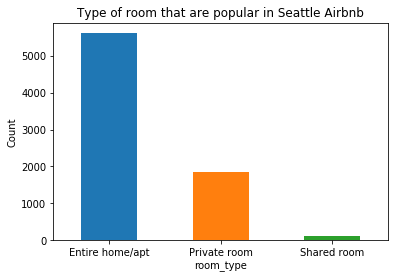

In [10]:
seattle.groupby('room_type').size().plot(kind='bar')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')
plt.title("Type of room that are popular in Seattle Airbnb")

### Popular bedroom preferences

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

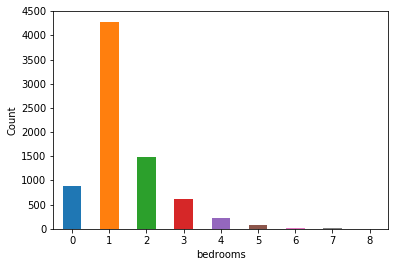

In [11]:
seattle.groupby('bedrooms').size().plot(kind='bar')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')

### Popular bathroom preferences

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

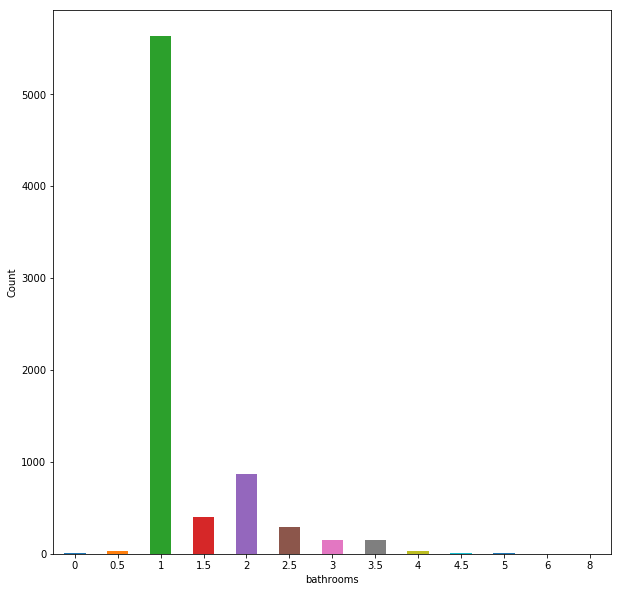

In [12]:
plt.figure(figsize=(10,10))
seattle.groupby('bathrooms').size().plot(kind='bar')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')

### Locality wity most expensive AirBnb in Seattle

In [13]:
seattle[seattle.price.isin(seattle.price.nlargest())].sort_values(['address','reviews','overall_satisfaction','bedrooms','bathrooms','price','room_type'], ascending= False)

,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
4260,4475,21015000,67467952,Entire home/apt,"Seattle, WA, United States",3,5,16,8,6,1650,33:19.0,47.630824,-122.368964,0101000020E6100000B0592E1B9D975EC015C440D7BED0...,Spacious Family-Friendly Tri-Plex with Views i...,USD,nightly
3069,3220,16816051,24047404,Entire home/apt,"Seattle, WA, United States",2,NaN,15,5,3.5,1395,40:55.7,47.547348,-122.266204,0101000020E61000001F84807C09915EC0F8C3CF7F0FC6...,Seattle Executive Home for Large Gatherings,USD,nightly
3994,4187,20178074,15178427,Entire home/apt,"Seattle, WA, United States",0,NaN,12,6,6,3000,29:42.3,47.658215,-122.381796,0101000020E6100000976F7D586F985EC04A5E9D6340D4...,Mega yacht,USD,nightly
71,73,152568,734114,Entire home/apt,"Mercer Island, WA, United States",2,NaN,10,3,4.5,5900,39:23.6,47.59259,-122.246703,0101000020E6100000CE3461FBC98F5EC0E4F736FDD9CB...,Luxury Waterfront Mansion,USD,nightly
5691,5956,24885575,117796167,Entire home/apt,"Kirkland, WA, United States",2,NaN,8,3,3.5,2800,57:04.8,47.707262,-122.248111,0101000020E6100000C8B1F50CE18F5EC00EDAAB8F87DA...,Waterfront luxury - your own private resort!,USD,nightly


## Feature engineering

In [14]:
# save original data
seattleCopy= seattle.copy()

In [15]:
seattleCopy.shape

(7576, 18)

In [16]:
pd.options.display.float_format = '{:.0f}'.format

* Unnamed
* room_id
* host_id
* latitude
* longitude
* last_modified

#### These columns mainly has ID kind of values and can is omitted 

In [17]:
seattleCopy.drop(['Unnamed: 0', 'room_id', 'host_id', 'latitude', 'longitude','last_modified','location', 'name', 'currency', 'rate_type'], axis=1, inplace=True)

### Check column names if they have been removed from the dataframe

In [18]:
seattleCopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7576 entries, 0 to 7575
Data columns (total 8 columns):
room_type               7576 non-null object
address                 7576 non-null object
reviews                 7576 non-null int64
overall_satisfaction    6103 non-null object
accommodates            7576 non-null int64
bedrooms                7576 non-null int64
bathrooms               7574 non-null object
price                   7576 non-null int64
dtypes: int64(4), object(4)
memory usage: 473.6+ KB


In [19]:
seattleCopy.address.unique()

array(['Seattle, WA, United States', 'Kirkland, WA, United States',
       'Bellevue, WA, United States', 'Redmond, WA, United States',
       'Mercer Island, WA, United States', 'Seattle, WA',
       'Renton, WA, United States', 'Ballard, Seattle, WA, United States',
       'West Seattle, WA, United States', 'Medina, WA, United States',
       '西雅图, WA, United States', 'Newcastle, WA, United States',
       'Seattle , WA, United States',
       'Ballard Seattle, WA, United States',
       'Yarrow Point, WA, United States', 'Clyde Hill, WA, United States',
       'Tukwila, WA, United States',
       'Seattle, Washington, US, WA, United States',
       'Capitol Hill, Seattle, WA, United States',
       'Kirkland , Wa, United States', 'Hunts Point, WA, United States',
       'Seattle, DC, United States', 'Seattle, United States',
       'Vashon, WA, United States', 'Kirkland , WA, United States',
       'Bothell, WA, United States', 'Washington, WA, United States'],
      dtype=object)

#### Same addresses are repeated in different formats. We will be replacing similar addresses

In [20]:
seattleCopy= seattleCopy.replace({"Ballard Seattle, WA, United States": "Ballard, Seattle, WA, United States",
                                  "Kirkland , Wa, United States":"Kirkland, WA, United States",
                                  "Seattle, DC, United States":"Seattle, WA, United States",
                                  "Seattle, United States":"Seattle, WA, United States",
                                  "Seattle, WA ":"Seattle, WA, United States",
                                  "Seattle, WA, United States":"Seattle, WA, United States",
                                  "Seattle, Washington, US, WA, United States":"Seattle, WA, United States",
                                  "西雅图, WA, United States":"Seattle, WA, United States",
                                 "Seattle , WA, United States": "Seattle, WA, United States",
                                 "Seattle, WA": "Seattle, WA, United States"})

### Lists column to check if addresses have been replaced properly

In [21]:
seattleCopy['address'].head(n=30)

0      Seattle, WA, United States
1      Seattle, WA, United States
2      Seattle, WA, United States
3      Seattle, WA, United States
4      Seattle, WA, United States
5      Seattle, WA, United States
6      Seattle, WA, United States
7      Seattle, WA, United States
8      Seattle, WA, United States
9      Seattle, WA, United States
10     Seattle, WA, United States
11     Seattle, WA, United States
12     Seattle, WA, United States
13     Seattle, WA, United States
14     Seattle, WA, United States
15     Seattle, WA, United States
16     Seattle, WA, United States
17     Seattle, WA, United States
18     Seattle, WA, United States
19    Kirkland, WA, United States
20     Seattle, WA, United States
21     Seattle, WA, United States
22     Seattle, WA, United States
23     Seattle, WA, United States
24     Seattle, WA, United States
25     Seattle, WA, United States
26    Bellevue, WA, United States
27     Seattle, WA, United States
28     Seattle, WA, United States
29     Seattle

## Dealing with missing values

In [22]:
 seattleCopy.apply(lambda x: sum(x.isnull()),axis=0)

room_type                  0
address                    0
reviews                    0
overall_satisfaction    1473
accommodates               0
bedrooms                   0
bathrooms                  2
price                      0
dtype: int64

In [23]:
# seattleCopy=seattleCopy.dropna()
# seattleCopy.shape

In [24]:
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

In [25]:
# from sklearn.impute import SimpleImputer
# imp = SimpleImputer(strategy="mean")
# (imp.fit_transform(seattleCopy.drop(['address','room_type'], axis=1)))

### Check which are in category features

In [26]:
category_features = seattleCopy.select_dtypes(include=['object']).columns.tolist()
print("Categorical features are: ", category_features)

Categorical features are:  ['room_type', 'address', 'overall_satisfaction', 'bathrooms']


#### convert 'room_type' to categories.

In [27]:
seattleCopy['room_type'] = seattleCopy['room_type'].astype('category') 

### Convert 'address' from object to string

In [28]:
seattleCopy['address'] = seattleCopy['address'].astype('str') 

In [29]:
seattleCopy['overall_satisfaction'].value_counts()

5      4410
4.5    1503
4       141
3.5      44
3         4
2.5       1
Name: overall_satisfaction, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

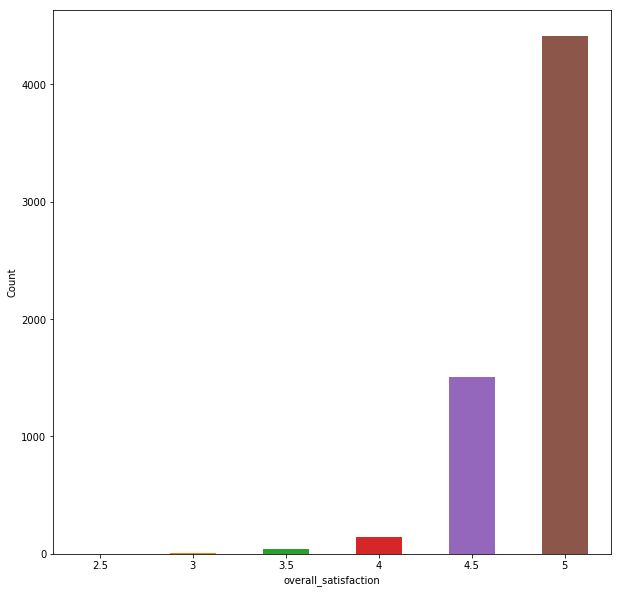

In [30]:
#Range of overall_satisfaction of Seattle AirBnB

plt.figure(figsize=(10,10))
seattleCopy.groupby('overall_satisfaction').size().plot(kind='bar')
plt.ylabel('Count')
plt.xticks(rotation='horizontal')

### 'overall_satisfaction' range is decimal. Thus, we must convert it from object to float

In [31]:
seattleCopy['overall_satisfaction'] = seattleCopy['overall_satisfaction'].astype('float') 

C:\Anaconda3\envs\py3.7\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


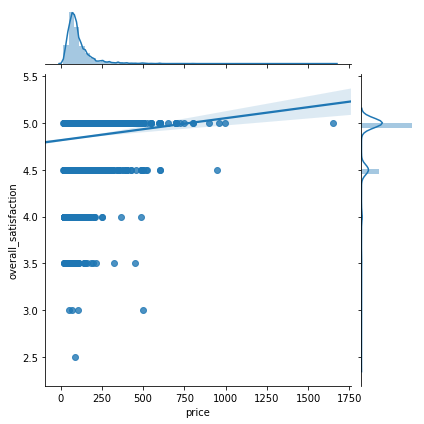

In [32]:
g = sns.jointplot("price", "overall_satisfaction", data=seattleCopy, kind="reg")

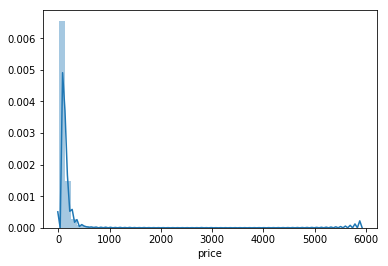

In [33]:
## Distribution plot of price of Seattle Airbnb
sns.distplot(seattleCopy.price)

C:\Anaconda3\envs\py3.7\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Anaconda3\envs\py3.7\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Anaconda3\envs\py3.7\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Anaconda3\envs\py3.7\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


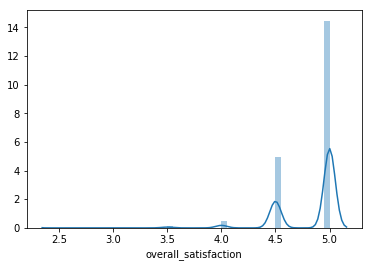

In [34]:
## Distribution of overall_satisfaction in the Seattle AirBnB dataset
sns.distplot(seattleCopy.overall_satisfaction)

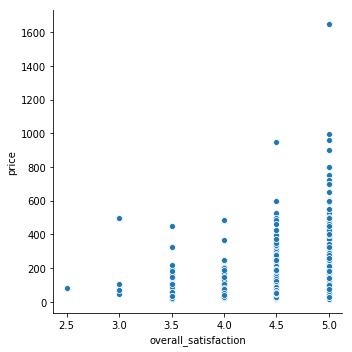

In [35]:
sns.relplot(x="overall_satisfaction", y="price", data=seattleCopy)

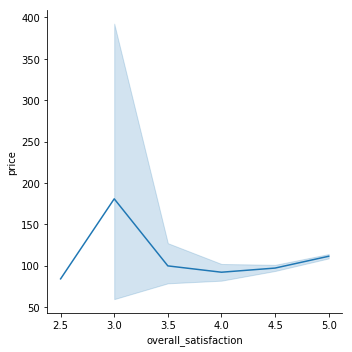

In [36]:
# 95% confidence interval
sns.relplot(x="overall_satisfaction", y="price", kind="line", data=seattleCopy)

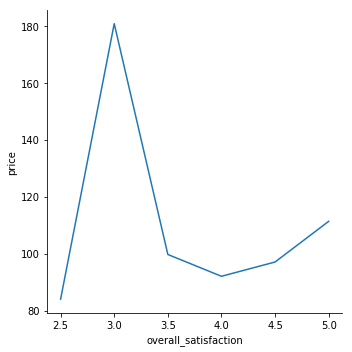

In [37]:
## with confidence interval as None
sns.relplot(x="overall_satisfaction", y="price", kind="line",ci=None, data=seattleCopy)

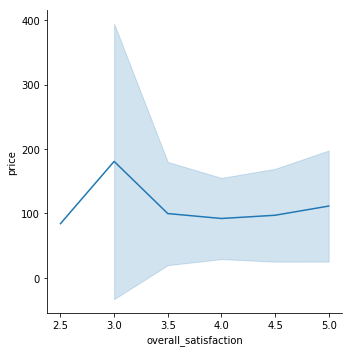

In [38]:
# spread of the distribution at each timepoint by plotting the standard deviation instead of a confidence interval:
sns.relplot(x="overall_satisfaction", y="price", kind="line",ci='sd', data=seattleCopy)

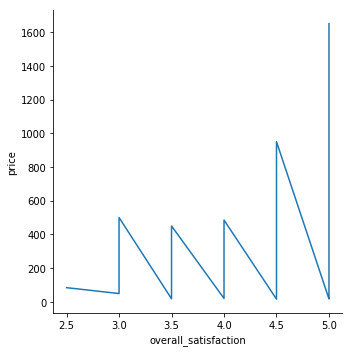

In [39]:
sns.relplot(x="overall_satisfaction", y="price", kind="line", estimator=None, data=seattleCopy)

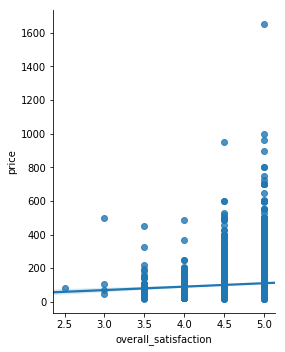

In [40]:
sns.pairplot(seattleCopy, x_vars=["overall_satisfaction"], y_vars=["price"],
             height=5, aspect=.8, kind="reg");

(array([2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 8 Text xticklabel objects>)

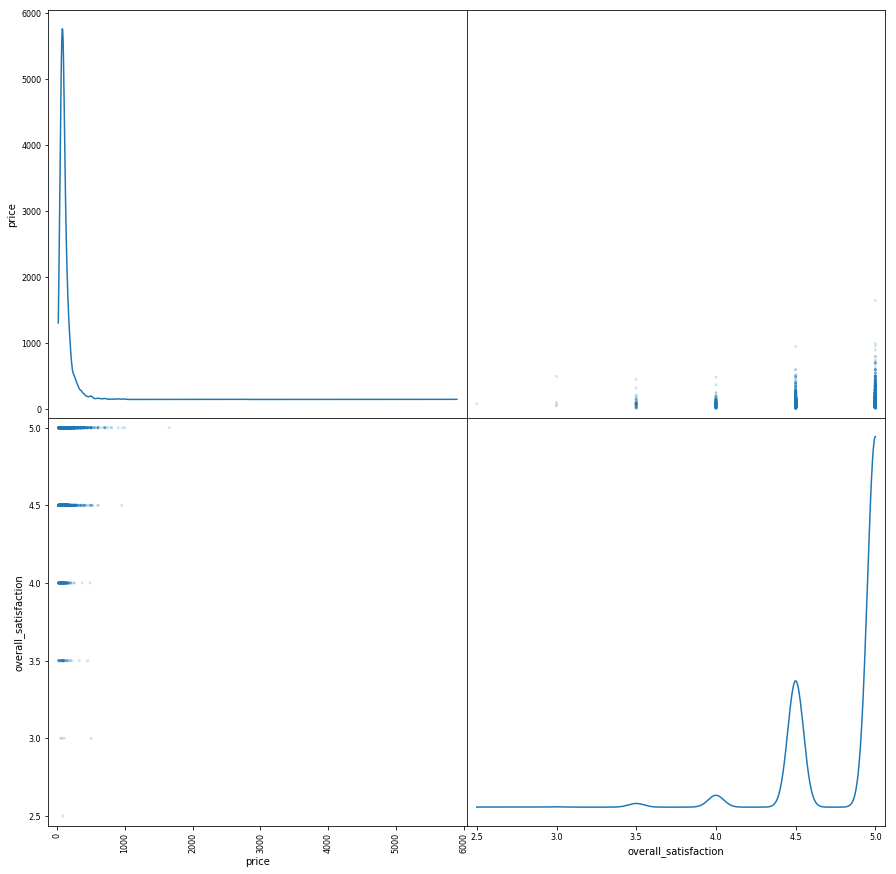

In [41]:
df1= seattleCopy[['price', 'overall_satisfaction']]
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.xticks(rotation='horizontal')

#### Check the dataset for null/ blank values

In [42]:
 seattleCopy.apply(lambda x: sum(x.isnull()),axis=0)

room_type                  0
address                    0
reviews                    0
overall_satisfaction    1473
accommodates               0
bedrooms                   0
bathrooms                  2
price                      0
dtype: int64

#### Since 'overall_satisfaction' still has 1473 null values, replace them with it's mean.

In [43]:
seattleCopy['overall_satisfaction'].describe()

count   6103
mean       5
std        0
min        2
25%        4
50%        5
75%        5
max        5
Name: overall_satisfaction, dtype: float64

In [44]:
seattleCopy['overall_satisfaction'].median()

5.0

In [45]:
#drop NA of overall_satisfaction
# seattleCopy=seattleCopy.dropna()

In [46]:
# replace missing values with the column mean
seattleCopy['overall_satisfaction'] = seattleCopy['overall_satisfaction'].fillna(seattleCopy['overall_satisfaction'].mean(skipna=True))

In [47]:
seattleCopy['overall_satisfaction'].describe()

count   7576
mean       5
std        0
min        2
25%        5
50%        5
75%        5
max        5
Name: overall_satisfaction, dtype: float64

In [48]:
 seattleCopy.apply(lambda x: sum(x.isnull()),axis=0)

room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               2
price                   0
dtype: int64

In [49]:
seattleCopy['overall_satisfaction'].head()

0   5
1   5
2   4
3   5
4   4
Name: overall_satisfaction, dtype: float64

#### Check if NA has been replaced

In [50]:
 seattleCopy.apply(lambda x: sum(x.isnull()),axis=0)

room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               2
price                   0
dtype: int64

#### Let's take a look at the 'bathroom' column

In [51]:
seattleCopy['bathrooms'].value_counts()

1      5630
2       867
1.5     397
2.5     289
3       154
3.5     150
4        34
0.5      28
0        10
4.5       6
5         4
8         3
6         2
Name: bathrooms, dtype: int64

#### Similarly, 'bathrooms' range is decimal. Thus, we must convert it from object to float

In [52]:
seattleCopy['bathrooms'] = seattleCopy['bathrooms'].astype('float') 

#### Check the dataset for null/ blank values

In [53]:
 seattleCopy.apply(lambda x: sum(x.isnull()),axis=0)

room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               2
price                   0
dtype: int64

#### Since 'bathrooms' still has 2 null values, replace that with it's mean.

In [54]:
seattleCopy['bathrooms'].describe()

count   7574
mean       1
std        1
min        0
25%        1
50%        1
75%        2
max        8
Name: bathrooms, dtype: float64

In [55]:
seattleCopy['bathrooms'] = seattleCopy['bathrooms'].fillna(seattleCopy['bathrooms'].mean())

In [56]:
seattleCopy['bathrooms'].head()

0   2
1   1
2   1
3   1
4   1
Name: bathrooms, dtype: float64

#### Check if NA has been replaced

In [57]:
 seattleCopy.apply(lambda x: sum(x.isnull()),axis=0)

room_type               0
address                 0
reviews                 0
overall_satisfaction    0
accommodates            0
bedrooms                0
bathrooms               0
price                   0
dtype: int64

In [58]:
seattleCopy.shape

(7576, 8)

### All null/blank values have been replaced. 

In [59]:
seattleCopy.dtypes

room_type               category
address                   object
reviews                    int64
overall_satisfaction     float64
accommodates               int64
bedrooms                   int64
bathrooms                float64
price                      int64
dtype: object

### Label encoding the 'room_type' column, which is mainly a category

In [60]:
# label encoding the 'room_type'   
le = LabelEncoder() 
seattleCopy['room_type']= le.fit_transform(seattleCopy['room_type']) 

In [61]:
seattleCopy['room_type'].value_counts()

0    5603
1    1844
2     129
Name: room_type, dtype: int64

### Now 'room_type',
* 0 : Entire home/apt
* 1 : Private room 
* 2 : Shared room

In [62]:
seattleCopy['room_type'].describe()

count   7576
mean       0
std        0
min        0
25%        0
50%        0
75%        1
max        2
Name: room_type, dtype: float64

### Check which are numerical features


In [63]:
# Check which are numerical features
num_features =seattleCopy.select_dtypes(include=[np.number]).columns.tolist()
print("Numerical features are: ", num_features)

Numerical features are:  ['room_type', 'reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'price']


## Find correlation among variables

In [64]:
seattleCopy.corr()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
room_type,1,-0,-0,-0,-0,0,-0
reviews,-0,1,0,-0,-0,-0,-0
overall_satisfaction,-0,0,1,0,0,0,0
accommodates,-0,-0,0,1,1,1,0
bedrooms,-0,-0,0,1,1,1,0
bathrooms,0,-0,0,1,1,1,0
price,-0,-0,0,0,0,0,1


In [65]:
# Correlation matrix
def plotCorrelationMatrix(df):
  #  df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    plt.figure(figsize=(20,15))
    corr = df.corr()
    corr.index = corr.columns
    sns.heatmap(corr, annot = True, cmap='coolwarm',fmt='.2f', vmin=-1, vmax=1)
    plt.xticks(rotation='horizontal')
    plt.yticks(rotation='horizontal')
    plt.title(f'Correlation Matrix for Seattle AirBnb Listings', fontsize=15)
    plt.show()

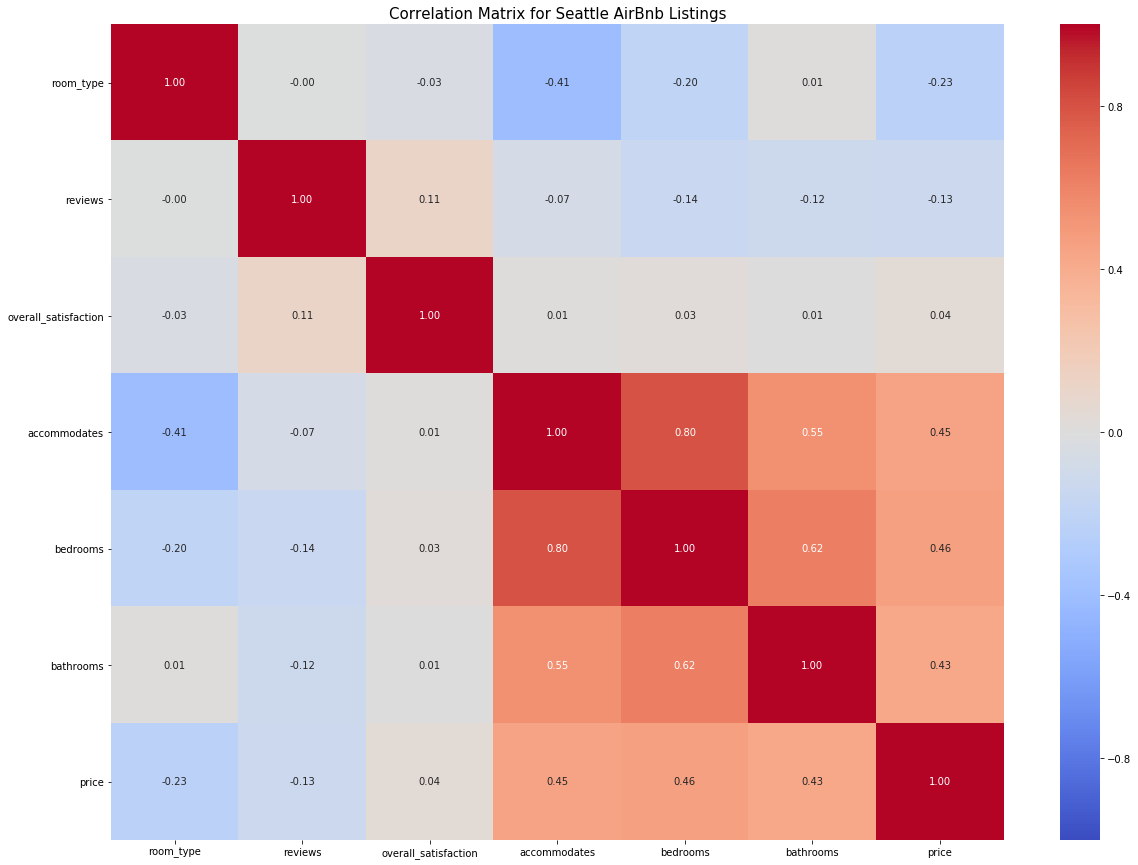

In [66]:
plotCorrelationMatrix(seattleCopy)

### Observations from heat map:

* The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. Therefore, *'price'* is positively correlated to *'bedrooms', 'accommodates', and 'bathrooms'*

* Values closer to zero means there is no linear trend between the two variables. Hence, *'overall_satisfaction'* and *'price'* do not have linear trend.

* A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. Thus, *'room_type', 'reviews'* are weakly realted to *'price'*

In [67]:
topTenAirBnbSeattle= seattleCopy.sort_values('price', ascending=False).head(10)[[ 'price', 'address']]
topTenAirBnbSeattle

,price,address
71,5900,"Mercer Island, WA, United States"
3994,3000,"Seattle, WA, United States"
5691,2800,"Kirkland, WA, United States"
4260,1650,"Seattle, WA, United States"
3069,1395,"Seattle, WA, United States"
3058,1200,"Seattle, WA, United States"
2225,999,"Seattle, WA, United States"
2100,995,"Seattle, WA, United States"
968,995,"Bellevue, WA, United States"
7369,980,"Seattle, WA, United States"


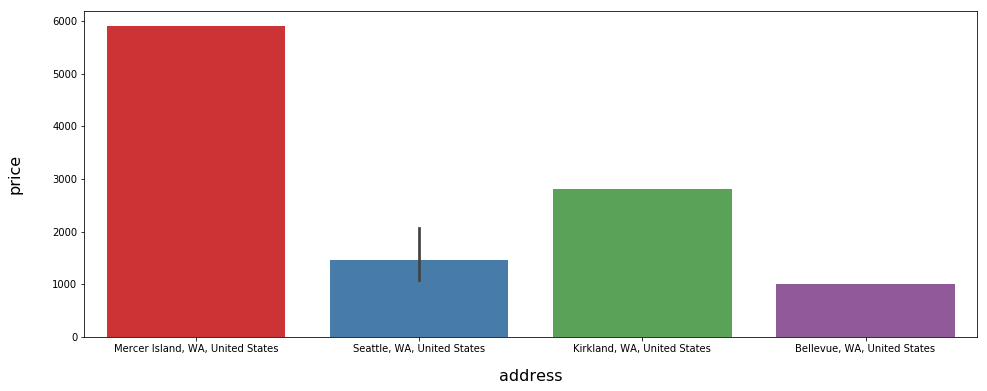

In [68]:
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='address', y='price', data=topTenAirBnbSeattle, palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
ax.xaxis.label.rotation=90
ax.yaxis.label.rotation=90
plt.show()

From the barplot we can see the top 4 places in Seattle to rent an AirBnb are:
* Mercer Island
* Seattle
* Kirkland
* Bellevue

In [69]:
seattleCopy.columns

Index(['room_type', 'address', 'reviews', 'overall_satisfaction',
       'accommodates', 'bedrooms', 'bathrooms', 'price'],
      dtype='object')

### A pairplot to see how price is realted to all columns except address

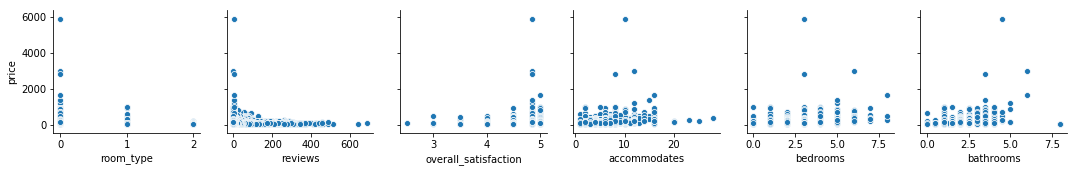

In [70]:
sns.pairplot(seattleCopy, x_vars=['room_type', 'reviews', 'overall_satisfaction', 'accommodates','bedrooms', 'bathrooms'],
                      y_vars=["price"], palette="husl")

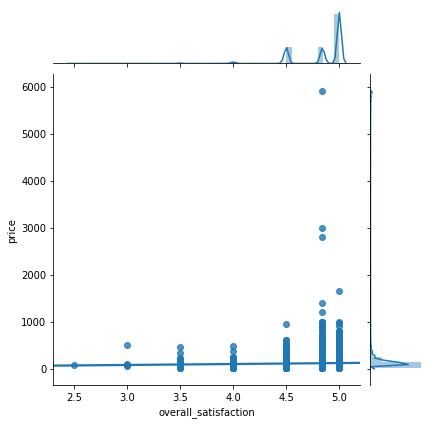

In [71]:
 g = sns.jointplot("overall_satisfaction", "price", data=seattleCopy, kind="reg")

## Feature Selection

#### Feature selection is picking the predictors best suited to help better predict the response.

### Chi-Squared statistical test for non-negative features to select the best features from the dataset

In [72]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)


#Initialize ChiSquare Class
cT = ChiSquare(seattleCopy)

#Feature Selection
testColumns = ['room_type', 'reviews', 'overall_satisfaction','accommodates', 'bedrooms', 'bathrooms']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="price" )  

room_type is IMPORTANT for Prediction
reviews is NOT an important predictor. (Discard reviews from model)
overall_satisfaction is IMPORTANT for Prediction
accommodates is IMPORTANT for Prediction
bedrooms is IMPORTANT for Prediction
bathrooms is IMPORTANT for Prediction


In [73]:
#find variance inflator
vi_x=seattleCopy.drop(['price','address'], axis=1)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(vi_x.values, i) for i in range(vi_x.shape[1])]
print(vif)

[1.786126064457546, 1.5826575221941055, 7.413552986796698, 12.443529769906068, 9.655166550474002, 9.059241947021508]


## Set predictors and response

The target here is **price**, which tells us the price of an AirBnb in Seattle.
 
 ##### Predictors are:
 * room_type
 * overall_satisfaction
 * accommodates
 * bedrooms
 * bathrooms

##### Response: price

In [74]:

# create X (features) and y (response)
X = seattleCopy.drop(['price','address','reviews'], axis=1)
y = seattleCopy['price']




## ['room_type', 'address', 'reviews', 'overall_satisfaction','accommodates', 'bedrooms', 'bathrooms', 'price'],

In [75]:
# split X and y into cross-validation (75%) and testing (25%) data sets

#  Setting random_state a fixed value will guarantee that same sequence of random numbers are generated each time you run the code.
# And unless there is some other randomness present in the process, the results produced will be same as always. This helps in verifying the output.
# However, if a fixed value is assigned like random_state = 0 or 1 or 42 then no matter how many times you execute your code the result would be the same .i.e, same values in train and test datasets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [76]:
print('X_train Shape:', X_train.shape)
print('X_train Shape:', X_train.columns.values)
print("\n")
print('X_test Shape:', X_test.shape)
print('X_test Shape:', X_test.columns.values)
print("\n")
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (5682, 5)
X_train Shape: ['room_type' 'overall_satisfaction' 'accommodates' 'bedrooms' 'bathrooms']


X_test Shape: (1894, 5)
X_test Shape: ['room_type' 'overall_satisfaction' 'accommodates' 'bedrooms' 'bathrooms']


y_train Shape: (5682,)
y_test Shape: (1894,)


## Predictive Model 1- Linear Model

In [77]:
# #Linear Model


def data_model(xdata):
    #add constant to data
    X = sm.add_constant(xdata)
    targetY=seattleCopy[['price']]
    y = targetY
    
    # Fit the linear model
    model = linear_model.LinearRegression()
    results = model.fit(X_train, y_train)
    y_pred_linear = model.predict(X_test)
    model = sm.OLS(y_train, X_train)
    results = model.fit()
    print("rsquared\n",results.rsquared)
    print("rsquared_adj\n",results.rsquared_adj)
    return results


In [78]:
def data_summary(xdata):
    """
    Returns chart having summary of data
   :param xdata: independent variable dataset
   :return: summary of data 
   
   """
    results = data_model(xdata)
    return results.summary()

In [79]:
data_summary(X_test)

rsquared
 0.5754999443835037
rsquared_adj
 0.5751260672867833


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     1539.
Date:                Mon, 27 Jan 2020   Prob (F-statistic):               0.00
Time:                        23:48:16   Log-Likelihood:                -34919.
No. Observations:                5682   AIC:                         6.985e+04
Df Residuals:                    5677   BIC:                         6.988e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
room_type              -43.3685      3.591    -12.076      0.000     -50.409     -36.328
overall_satisfaction     2.0243      0.776      2.609      0.009       0.503       3.545
accommodates             3.2067      1.199      2.674      0.008       0.856       5.557
bedrooms                26.5230      2.686      9.873      0.000      21.257      31.789
bathrooms               51.0579      3.076     16.596      0.000      45.027      57.089
==============================================================================
Omnibus:                    13952.251   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        294483264.429
Skew:                          25.640   Prob(JB):                         0.00
Kurtosis:                    1117.104   Cond. No.                         17.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that R^2 and adjusted R^2 are nearly same. Thus, this is a good model.

In [80]:
def calc_train_error(X_train, y_train, model):
    '''returns in-sample error for already fit model.'''
    predictions = model.predict(X_train)
    mse = mean_squared_error(y_train, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_validation_error(X_test, y_test, model):
    '''returns out-of-sample error for already fit model.'''
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return mse
    
def calc_metrics(X_train, y_train, X_test, y_test, model):
    '''fits model and returns the RMSE for in-sample error and out-of-sample error'''
    model.fit(X_train, y_train)
    train_error = calc_train_error(X_train, y_train, model)
    validation_error = calc_validation_error(X_test, y_test, model)
    return train_error, validation_error

In [81]:
def crossValidationError(data):
    """
   Finds cross validation error of model
   :param X: independent variable dataset
   :return: float value returns mean squared error
   """
    numericdataX=data
    X = np.array(numericdataX.drop(['price', 'address'],axis=1), dtype=pd.Series)
    Y = np.array(numericdataX['price'], dtype=pd.Series)
    regr1 = linear_model.LinearRegression()
    ms_errors= cross_val_score(regr1, X, Y, cv=10, scoring = make_scorer(mean_squared_error))
    rms_errors = np.sqrt(ms_errors)
    mean_rms_error = rms_errors.mean()
    return mean_rms_error

In [82]:
numericdataX= seattleCopy
#pd.concat([numericdataX, X_train, y_train], axis=1)
crossValidationError(numericdataX)

94.99255489221709

In [83]:
lr = LinearRegression(fit_intercept=True)

train_error, test_error = calc_metrics(X_train, y_train, X_test, y_test, lr)
train_error, test_error = round(train_error, 3), round(test_error, 3)

print('train error: {} | test error: {}'.format(train_error, test_error))
print('train/test: {}'.format(round(test_error/train_error, 1)))

train error: 12737.448 | test error: 5187.728
train/test: 0.4


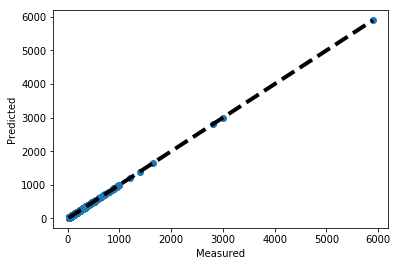

In [84]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt

lr = linear_model.LinearRegression()
df1 = seattleCopy.drop(['address'], axis=1)
y = df1.price

# cross_val_predict returns an array of the same size as `y` where each entry
# is a prediction obtained by cross validation:
predicted = cross_val_predict(lr, df1, y, cv=10)

fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

#### Is the relationship significant?
A: Yes. adjusted R2 is nearly same as R2. 

#### Are any model assumptions violated?

A: Yes. Multi-colinearity exists.

#### Is there any multi-collinearity in the model?

A: Yes. Between accomodates, bedrooms, and bathrooms.

In [85]:
seattleCopy.corr()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
room_type,1,-0,-0,-0,-0,0,-0
reviews,-0,1,0,-0,-0,-0,-0
overall_satisfaction,-0,0,1,0,0,0,0
accommodates,-0,-0,0,1,1,1,0
bedrooms,-0,-0,0,1,1,1,0
bathrooms,0,-0,0,1,1,1,0
price,-0,-0,0,0,0,0,1


#### In the multivariate models are predictor variables independent of all the other predictor variables?

A: room_type, reviews, and overall_satisfaction are independent of other variables. 

#### In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

A:

In [86]:
cT = ChiSquare(seattleCopy)

#Feature Selection
testColumns = ['room_type', 'reviews', 'overall_satisfaction','accommodates', 'bedrooms', 'bathrooms']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="price" )  

room_type is IMPORTANT for Prediction
reviews is NOT an important predictor. (Discard reviews from model)
overall_satisfaction is IMPORTANT for Prediction
accommodates is IMPORTANT for Prediction
bedrooms is IMPORTANT for Prediction
bathrooms is IMPORTANT for Prediction


#### Does the model make sense?

A: Yes. Since 80% of the price (R^2)  is explained by predictors, i.e: 'room_type'  'overall_satisfaction' 'accommodates' 'bedrooms'
 'bathrooms' 

#### Does regularization help?

A: No. Model did not over-fit 

In [87]:
## Ridge Regression

ridge = Ridge(alpha=0.1, normalize = True)
ridge.fit(X_train,y_train)
ridge_pred=ridge.predict(X_test)
ridge.score(X_test,y_test)
#The score is pretty much similar to the linear model built which ensures that the model has passed the Ridge regression test
# for regularization
#Ridge is used to penalize the loss function by adding the OLS loss function to the square of each coefficient multiplied by alpha.


0.38315422103829766

#### Which independent variables are significant?

A: 'accomodates', 'bedrooms, 'bathrooms', since they have the highest positive colinearity with price

#### Which hyperparameters are important?

A: lambda

## Predictive Model 2- K-nearest

In [88]:

# create X (features) and y (response)
X_knn = seattleCopy.drop(['price','address'], axis=1)
y_knn = seattleCopy['price']

# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn,y_knn, test_size=0.25, random_state=42) # 70% training and 30% test

In [89]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=2)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [90]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_knn, y_pred))

Accuracy: 0.04171066525871172


#### Is the relationship significant?
A: Yes. Accuracy of 41.71 %

#### Are any model assumptions violated?

A: Yes. n_neighbors are given high values to improve accuracy.

#### Is there any multi-collinearity in the model?

A: Yes. Between accomodates, bedrooms, and bathrooms.

In [91]:
seattleCopy.corr()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
room_type,1,-0,-0,-0,-0,0,-0
reviews,-0,1,0,-0,-0,-0,-0
overall_satisfaction,-0,0,1,0,0,0,0
accommodates,-0,-0,0,1,1,1,0
bedrooms,-0,-0,0,1,1,1,0
bathrooms,0,-0,0,1,1,1,0
price,-0,-0,0,0,0,0,1


#### In the multivariate models are predictor variables independent of all the other predictor variables?

A: room_type, reviews, and overall_satisfaction are independent of other variables. 

#### In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

A:

In [92]:
cT = ChiSquare(seattleCopy)

#Feature Selection
testColumns = ['room_type', 'reviews', 'overall_satisfaction','accommodates', 'bedrooms', 'bathrooms']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="price" )  

room_type is IMPORTANT for Prediction
reviews is NOT an important predictor. (Discard reviews from model)
overall_satisfaction is IMPORTANT for Prediction
accommodates is IMPORTANT for Prediction
bedrooms is IMPORTANT for Prediction
bathrooms is IMPORTANT for Prediction


#### Does the model make sense?

A: Yes. Increase in accuracy due to n_neighbors increase

#### Which independent variables are significant?

A: 'accomodates', 'bedrooms, 'bathrooms', since they have the highest positive colinearity with price

#### Which hyperparameters are important?

A: n_neighbors

## Predictive Model 3- Decision Trees

In [93]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [94]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [95]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.08342133051742344


In [96]:
from sklearn.ensemble import RandomForestRegressor
#Put 10 for the n_estimators argument. n_estimators mean the number #of trees in the forest.
regressor = RandomForestRegressor(n_estimators=6, random_state=0)
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=6, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [97]:
regressor.predict(X_test)

array([ 88.93215399, 201.38888889,  79.81869732, ..., 259.09722222,
        79.81869732,  96.18143177])

#### Is the relationship significant?
A: Yes. 83% accuracy.

#### Are any model assumptions violated?

A: Yes, the depth level value was given high to increase accuracy.


#### Is there any multi-collinearity in the model?

A: Yes. Between accomodates, bedrooms, and bathrooms.

In [98]:
seattleCopy.corr()

,room_type,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price
room_type,1,-0,-0,-0,-0,0,-0
reviews,-0,1,0,-0,-0,-0,-0
overall_satisfaction,-0,0,1,0,0,0,0
accommodates,-0,-0,0,1,1,1,0
bedrooms,-0,-0,0,1,1,1,0
bathrooms,0,-0,0,1,1,1,0
price,-0,-0,0,0,0,0,1


#### In the multivariate models are predictor variables independent of all the other predictor variables?

A: room_type, reviews, and overall_satisfaction are independent of other variables. 

#### In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

A:

In [99]:
cT = ChiSquare(seattleCopy)

#Feature Selection
testColumns = ['room_type', 'reviews', 'overall_satisfaction','accommodates', 'bedrooms', 'bathrooms']
for var in testColumns:
    cT.TestIndependence(colX=var,colY="price" )  

room_type is IMPORTANT for Prediction
reviews is NOT an important predictor. (Discard reviews from model)
overall_satisfaction is IMPORTANT for Prediction
accommodates is IMPORTANT for Prediction
bedrooms is IMPORTANT for Prediction
bathrooms is IMPORTANT for Prediction


#### Does the model make sense?

A: Yes. Increase in accuracy due to n_neighbors increase

#### Which independent variables are significant?

A: 'accomodates', 'bedrooms, 'bathrooms', since they have the highest positive colinearity with price

#### Which hyperparameters are important?

A: n_estimators

# Conclusions

Based on the analysis of the dataset, we have taken the price as the independent variable and rest of the variable as the dependent variables.

So we determine price in Seattle based on the independent variables such as room_type, overall_satisfaction, accomodates, bedrooms and bathrooms.

We perform the Linear model, has good R2 value of 0.57 and which gives the cross-validation error of 94% 

And it can detected using Variance Inflation Factor(VIF).The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression. It is calculated by taking the the ratio of the variance of all a given model's betas divide by the variane of a single beta if it were fit alone. None of the predictors in our case has a high value of VIF. Hence,would not need to discard one of these variables before moving on to model building or risk building a model with high multicolinearity.

# Citations

* https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
* https://seaborn.pydata.org/tutorial/relational.html#relating-variables-with-scatter-plots
* https://www.datacamp.com/community/tutorials/categorical-data
* https://jamesrledoux.com/code/imputation
* https://seaborn.pydata.org/generated/seaborn.pairplot.html
* https://cmdlinetips.com/2019/02/how-to-make-histogram-in-python-with-pandas-and-seaborn/
* https://towardsdatascience.com/analyze-the-data-through-data-visualization-using-seaborn-255e1cd3948e
* https://machinelearningmastery.com/an-introduction-to-feature-selection/

# Contributions

By own: 45%
External resource: 55%

# The MIT License


Copyright (c)  2020 Seemanthini Jois

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.